## End-to-End Cybersecurity Threat Detection Using NSL-KDD: From EDA to Model Deployment

### Setp 1: Install Required Libraries ####

In [2]:
! pip install klib
! pip install lazypredict
! pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Step 2: Import Required Packages ###

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pickle

### Step 3: Load the Dataset ###

In [4]:
data=pd.read_csv(r"C:\Users\ashee\OneDrive\Desktop\cyber kdd\KDDTrain20.csv")
df_original = data.copy()
df_processed = df_original.copy()
data.shape

(22544, 42)

In [68]:
df_original.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.00,b'tcp',b'private',b'REJ',0.00,0.00,b'0',0.00,0.00,0.00,...,10.00,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
1,0.00,b'tcp',b'private',b'REJ',0.00,0.00,b'0',0.00,0.00,0.00,...,1.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
2,2.00,b'tcp',b'ftp_data',b'SF',12983.00,0.00,b'0',0.00,0.00,0.00,...,86.00,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,b'normal'
3,0.00,b'icmp',b'eco_i',b'SF',20.00,0.00,b'0',0.00,0.00,0.00,...,57.00,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,b'anomaly'
4,1.00,b'tcp',b'telnet',b'RSTO',0.00,15.00,b'0',0.00,0.00,0.00,...,86.00,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,b'anomaly'


In [69]:
df_original.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
22539,0.00,b'tcp',b'smtp',b'SF',794.00,333.00,b'0',0.00,0.00,0.00,...,141.00,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,b'normal'
22540,0.00,b'tcp',b'http',b'SF',317.00,938.00,b'0',0.00,0.00,0.00,...,255.00,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,b'normal'
22541,0.00,b'tcp',b'http',b'SF',54540.00,8314.00,b'0',0.00,0.00,2.00,...,255.00,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,b'anomaly'
22542,0.00,b'udp',b'domain_u',b'SF',42.00,42.00,b'0',0.00,0.00,0.00,...,252.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
22543,0.00,b'tcp',b'sunrpc',b'REJ',0.00,0.00,b'0',0.00,0.00,0.00,...,21.00,0.08,0.03,0.00,0.00,0.00,0.00,0.44,1.00,b'anomaly'


### Step 4: Data Understanding ###

In [70]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [71]:
df_original.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,22544.00,22544,22544,22544,22544.00,22544.00,22544,22544.00,22544.00,22544.00,...,22544.00,22544.00,22544.00,22544.00,22544.00,22544.00,22544.00,22544.00,22544.00,22544
unique,NaN,3,64,11,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,b'tcp',b'http',b'SF',NaN,NaN,b'0',NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'anomaly'
freq,NaN,18880,7853,14875,NaN,NaN,22537,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12833
mean,218.86,NaN,NaN,NaN,10395.45,2056.02,NaN,0.01,0.00,0.11,...,140.75,0.61,0.09,0.13,0.02,0.10,0.10,0.23,0.23,NaN
std,1407.18,NaN,NaN,NaN,472786.43,21219.30,NaN,0.14,0.04,0.93,...,111.78,0.44,0.22,0.31,0.09,0.27,0.28,0.39,0.40,NaN
min,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,0.00,...,15.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,0.00,NaN,NaN,NaN,54.00,46.00,NaN,0.00,0.00,0.00,...,168.00,0.92,0.01,0.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,0.00,NaN,NaN,NaN,287.00,601.00,NaN,0.00,0.00,0.00,...,255.00,1.00,0.06,0.03,0.01,0.00,0.00,0.36,0.17,NaN


* duration: Duration of the connection.
  
* protocol_type: Type of the protocal e.g, tcp, icmp,udp .
  
* service : Network service on the destination e.g , http,smtp,private.
  
* flag : Normal or error status of the connection (SF for nonal connection, REJ for rejected connection one.)
  
* src_bytes & dst_bytes : The amount of data sent from the source and received by the destination.
  
* land : land indicate if  the connection if from same source and Ip .
  
* wrong_fragment: number of wrong fragment.
  
* urgent: unmber of wrong urnget.
  
* The final coloumn "class": class tells you connection is normal or abnormal ( a potentioal or attack). 


### Step 5 : Exploratory Data Analysis ###

#### Check the data quality ####

* there are unneccesary byte string in the dataset so it might be cause a problem when we build ml model .
* there are so many column 's value in float but they should be in int if they represent count .

#### Find the missing value ####

In [72]:
df_original.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### check all the columns #### 

In [73]:
# this code will show all the columns 
pd.set_option('display.max_columns', None)
# it will limit the rows so will not get load on the pc 
pd.set_option('display.max_rows',10)
df_original

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.00,b'tcp',b'private',b'REJ',0.00,0.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',229.00,10.00,0.00,0.00,1.00,1.00,0.04,0.06,0.00,255.00,10.00,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
1,0.00,b'tcp',b'private',b'REJ',0.00,0.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',136.00,1.00,0.00,0.00,1.00,1.00,0.01,0.06,0.00,255.00,1.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
2,2.00,b'tcp',b'ftp_data',b'SF',12983.00,0.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,134.00,86.00,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,b'normal'
3,0.00,b'icmp',b'eco_i',b'SF',20.00,0.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',1.00,65.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3.00,57.00,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,b'anomaly'
4,1.00,b'tcp',b'telnet',b'RSTO',0.00,15.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',1.00,8.00,0.00,0.12,1.00,0.50,1.00,0.00,0.75,29.00,86.00,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.00,b'tcp',b'smtp',b'SF',794.00,333.00,b'0',0.00,0.00,0.00,0.00,b'1',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,100.00,141.00,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,b'normal'
22540,0.00,b'tcp',b'http',b'SF',317.00,938.00,b'0',0.00,0.00,0.00,0.00,b'1',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',2.00,11.00,0.00,0.00,0.00,0.00,1.00,0.00,0.18,197.00,255.00,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,b'normal'
22541,0.00,b'tcp',b'http',b'SF',54540.00,8314.00,b'0',0.00,0.00,2.00,0.00,b'1',1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',5.00,10.00,0.00,0.00,0.00,0.00,1.00,0.00,0.20,255.00,255.00,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,b'anomaly'
22542,0.00,b'udp',b'domain_u',b'SF',42.00,42.00,b'0',0.00,0.00,0.00,0.00,b'0',0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'0',b'0',4.00,6.00,0.00,0.00,0.00,0.00,1.00,0.00,0.33,255.00,252.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


#### Removing unnecessary Byte Strings "b" & convert float to int where is essential  ####

In [76]:
# Step 1: Decode byte-type objects to strings
for col in df_original.select_dtypes(include=['object']).columns:
    df_original[col] = df_original[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 2: Remove leftover "b'...'" text from string columns
for col in df_original.select_dtypes(include=['object']).columns:
    df_original[col] = df_original[col].str.replace(r"^b'(.*)'$", r"\1", regex=True)

# Step 3: Convert numerical string values to float safely
# Only for columns that should be numeric
float_to_int_cols = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'count', 'srv_count', 'dst_host_srv_count', 'dst_srv_count','is_guest_login','is_host_login','logged_in'
]

for col in float_to_int_cols:
    if col in df_original.columns:
        # Convert to numeric with error handling (non-convertible values become NaN)
        df_original[col] = pd.to_numeric(df_original[col], errors='coerce').fillna(0).astype(int)
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int32  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int32  
 5   dst_bytes                    22544 non-null  int32  
 6   land                         22544 non-null  int32  
 7   wrong_fragment               22544 non-null  int32  
 8   urgent                       22544 non-null  int32  
 9   hot                          22544 non-null  int32  
 10  num_failed_logins            22544 non-null  int32  
 11  logged_in                    22544 non-null  int32  
 12  num_compromised              22544 non-null  int32  
 13  root_shell      

In [77]:
df_original 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.00,0.00,1.00,1.00,0.04,0.06,0.00,255.00,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.00,0.00,1.00,1.00,0.01,0.06,0.00,255.00,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,134.00,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3.00,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.00,0.12,1.00,0.50,1.00,0.00,0.75,29.00,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,100.00,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.00,0.00,0.00,0.00,1.00,0.00,0.18,197.00,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.00,0.00,0.00,0.00,1.00,0.00,0.20,255.00,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.00,0.00,0.00,0.00,1.00,0.00,0.33,255.00,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


#### Check the distribution of 'class' column ####

In [78]:
df_original['class'].value_counts()

class
anomaly    12833
normal      9711
Name: count, dtype: int64

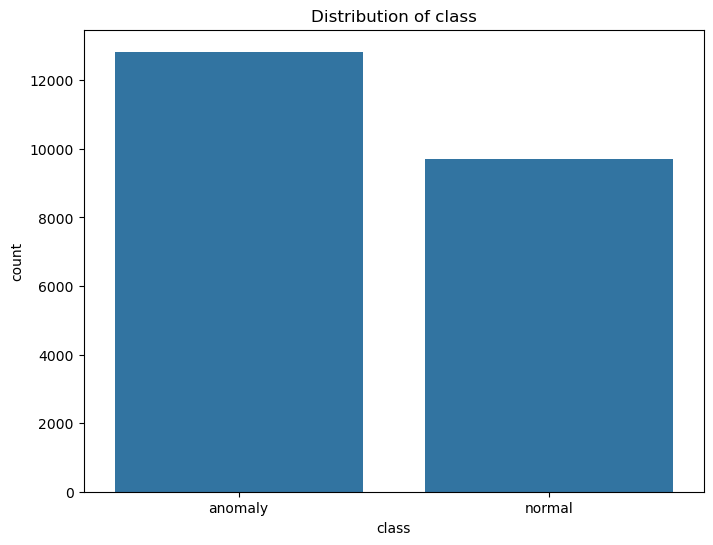

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_original,x='class')
plt.title('Distribution of class')
plt.show()


In [81]:
class_distribution=df_original['class'].value_counts(normalize=True)
class_distribution

class
anomaly   0.57
normal    0.43
Name: proportion, dtype: float64

#### The distribution of class indicate that : ####
* Approximately 56 % of data is abnormal & Approximately 43 % of data is normal.
* This dataset is good balance dataset.

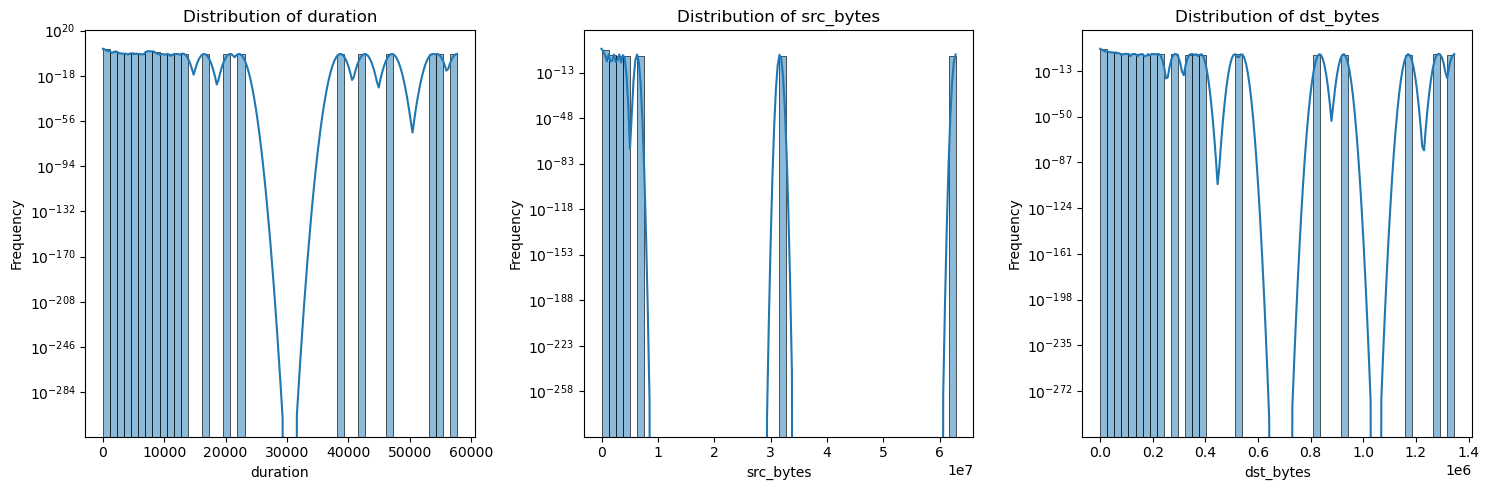

In [82]:
# Distribution of selected numerical columns
selected_numerical_cols = ['duration', 'src_bytes', 'dst_bytes']

plt.figure(figsize=(15, 5))

for i, col in enumerate(selected_numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_original[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.yscale('log')  # Using log scale for better visualization

plt.tight_layout()
plt.show()

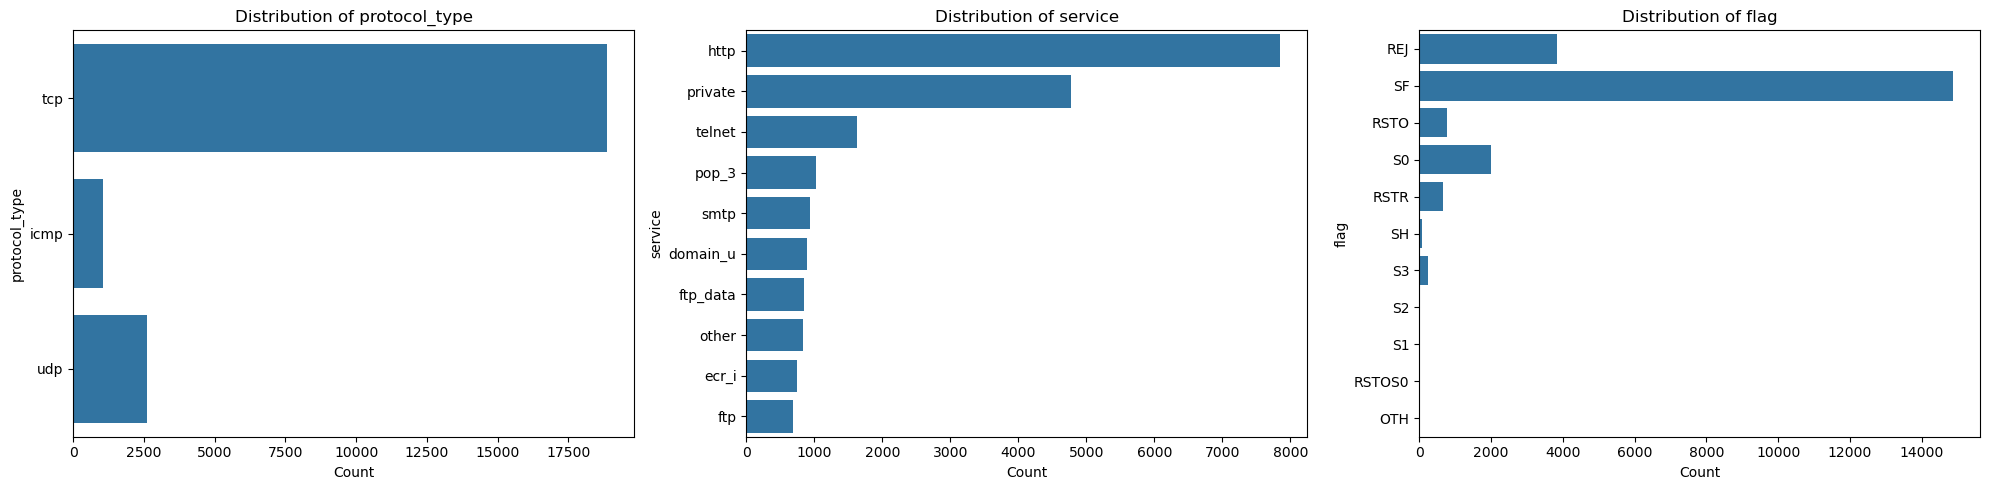

In [17]:
# Distribution of selected categorical columns
selected_categorical_cols = ['protocol_type', 'service', 'flag']

plt.figure(figsize=(20, 5))

for i, col in enumerate(selected_categorical_cols, 1):
    plt.subplot(1, 3, i)
    if col == 'service':
        order = df_processed[col].value_counts().index[:10]  # Top 10 services
        sns.countplot(data=df_processed, y=col, order=order)
    else:
        sns.countplot(data=df_processed, y=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Step 6: Featuring Engineering ###
##### Note: From now on, we will use the "df_processed" data because any deletions or changes will not affect our "original_dataset". ####

In [85]:
# remove the rows with missing value
kl.missingval_plot(df_original,figsize=(6,5))

No missing values found in the dataset.


In [89]:
# remove the duplicated rows, we will ingore id column
print(df_original.shape)
df_original.drop_duplicates(subset=df_original.columns[1:],inplace=True)
print(df_original.shape)

(22544, 42)
(22372, 42)


##### There is no duplicate and missing value which is better #####

#### Encoding the categorical features ####

In [20]:
from sklearn import preprocessing
import pickle
encoder = preprocessing.LabelEncoder()
df_processed['class'] = encoder.fit_transform(df_processed['class'])
print("Class mapping:", encoder.classes_)
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

Class mapping: ['anomaly' 'normal']


In [21]:
encoder.classes_

array(['anomaly', 'normal'], dtype=object)

In [22]:
encoder.inverse_transform([0,1])

array(['anomaly', 'normal'], dtype=object)

#### Feature Selection ####

#### Feature selection is crucial for improving the efficiency and performance of machine learning models, when dealing with datasets 
#### having many features. There are multiple methods to perform feature selection, including:

* Statistical Tests: For example, the chi-squared test for categorical variables.
* Correlation Coefficient: Features with high correlation might be redundant. Recursive Feature Elimination: A method where 
features are recursively removed and the model is evaluated.
* Feature Importance from Tree-based models: Algorithms like Decision Trees, Random Forests, and Gradient Boosted Trees 
provide a feature importance score.

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Feature-correlation (pearson)'}>

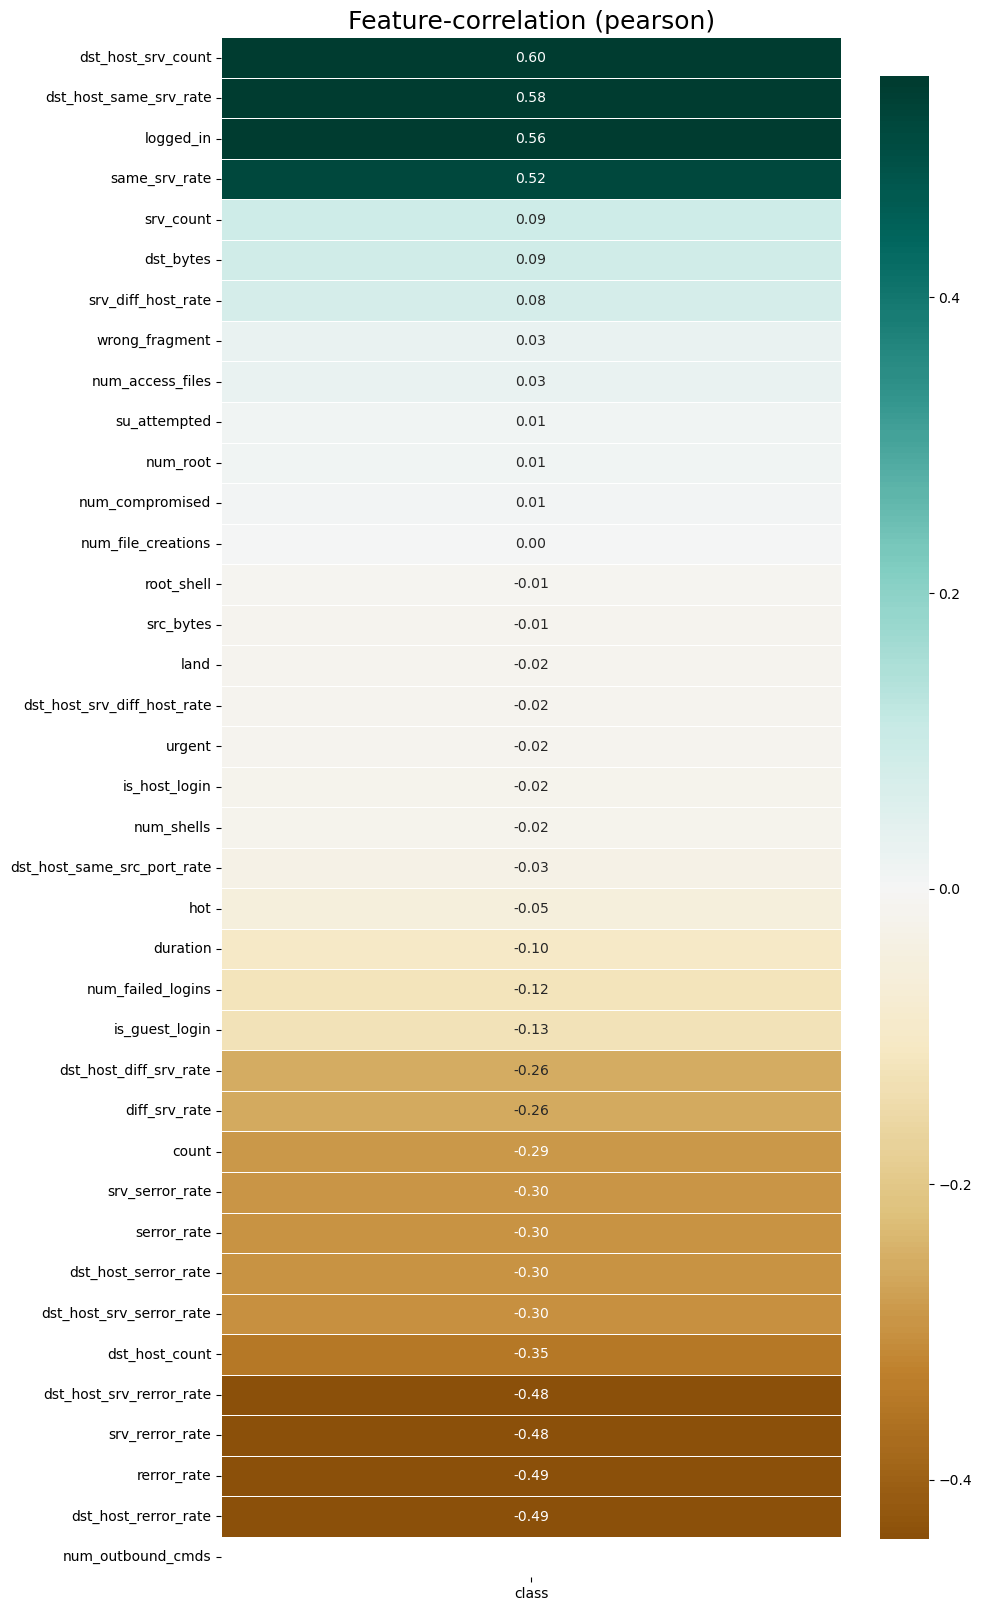

In [23]:
# using corelation matrix to find the most important features
kl.corr_plot(df_processed,figsize=(10,20),target='class')

In [24]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Remove  the 'class' column
X = df_processed.drop(columns=['class'])
y = df_processed['class']

# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X)

# Fit a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)


RandomForestClassifier(random_state=42)

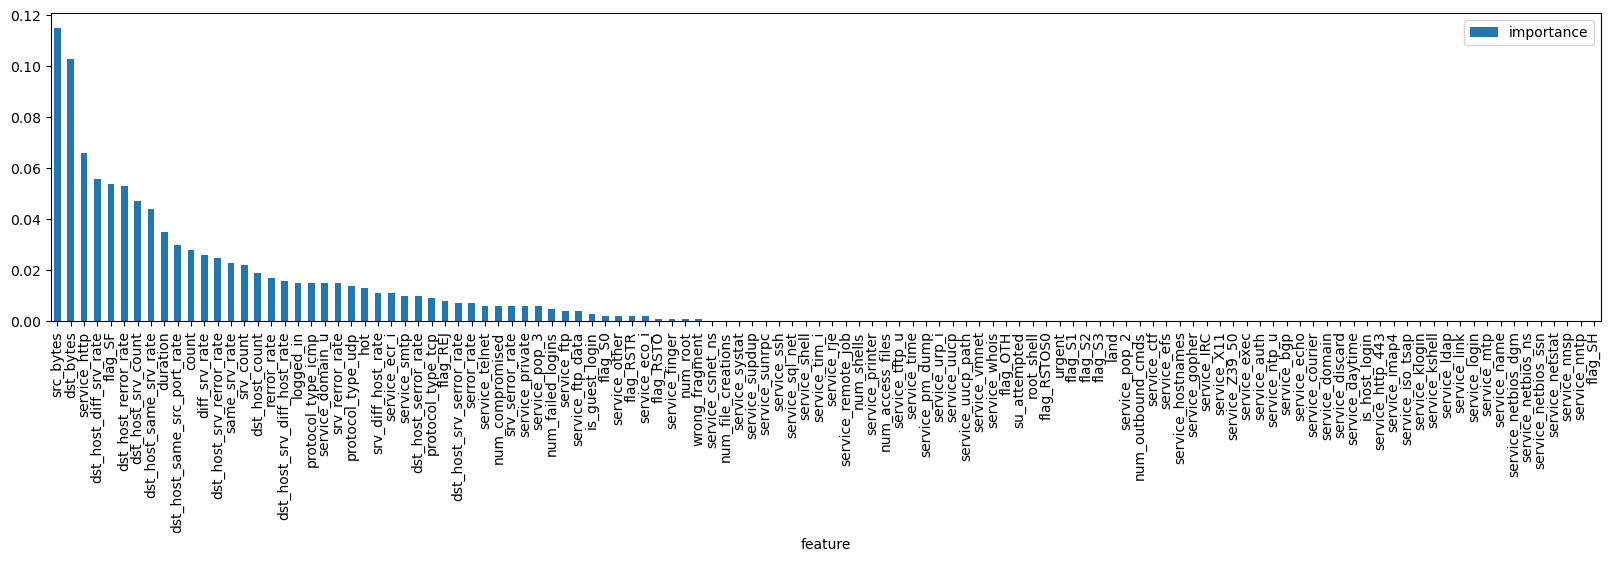

In [25]:
score = np.round(clf.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (20, 4)
importances.plot.bar();


In [26]:
# Get feature importances
feature_importances = clf.feature_importances_

# Pairing feature names with their importance scores
features = list(X.columns)
feature_importance_pairs = list(zip(features, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

sorted_feature_importance[:15]  # Displaying the top 10 important features

[('src_bytes', 0.11541564665642792),
 ('dst_bytes', 0.1026739327009806),
 ('service_http', 0.06638607233256273),
 ('dst_host_diff_srv_rate', 0.05555006513337688),
 ('flag_SF', 0.05367019184551759),
 ('dst_host_rerror_rate', 0.05323765895044484),
 ('dst_host_srv_count', 0.0471503300836567),
 ('dst_host_same_srv_rate', 0.04363530185472486),
 ('duration', 0.03451025287528488),
 ('dst_host_same_src_port_rate', 0.02972237269281292),
 ('count', 0.028155987521247126),
 ('diff_srv_rate', 0.026476294339286433),
 ('dst_host_srv_rerror_rate', 0.024539068245285102),
 ('same_srv_rate', 0.02327269556709903),
 ('srv_count', 0.021682693467474246)]

In [27]:
# After testing it looks like this is the best selection

df_processed= df_processed.loc[:,['count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'src_bytes',
 'srv_count',
 'srv_serror_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_count',
              'class']]

In [28]:
df_processed

,count,dst_host_srv_serror_rate,dst_host_serror_rate,same_srv_rate,diff_srv_rate,src_bytes,srv_count,srv_serror_rate,dst_host_srv_diff_host_rate,dst_host_srv_count,dst_host_count,class
0,229,0.0,0.00,0.04,0.06,0,10,0.00,0.00,10,255.0,0
1,136,0.0,0.00,0.01,0.06,0,1,0.00,0.00,1,255.0,0
2,1,0.0,0.00,1.00,0.00,12983,1,0.00,0.02,86,134.0,1
3,1,0.0,0.00,1.00,0.00,20,65,0.00,0.28,57,3.0,0
4,1,0.0,0.00,1.00,0.00,0,8,0.12,0.02,86,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,0.0,0.01,1.00,0.00,794,1,0.00,0.01,141,100.0,1
22540,2,0.0,0.01,1.00,0.00,317,11,0.00,0.01,255,197.0,1
22541,5,0.0,0.00,1.00,0.00,54540,10,0.00,0.00,255,255.0,0
22542,4,0.0,0.00,1.00,0.00,42,6,0.00,0.00,252,255.0,1


### Step 7 : Data pre_processing ###

* Important Phase : next we will use a data augmentation method called SMOTE to balance the data, we will use it only on  
the train set to avoid overfitting, but we don't want to test our data on a made up data from SMOT, so we will use stratified 
 sampling to keep the test data for later
  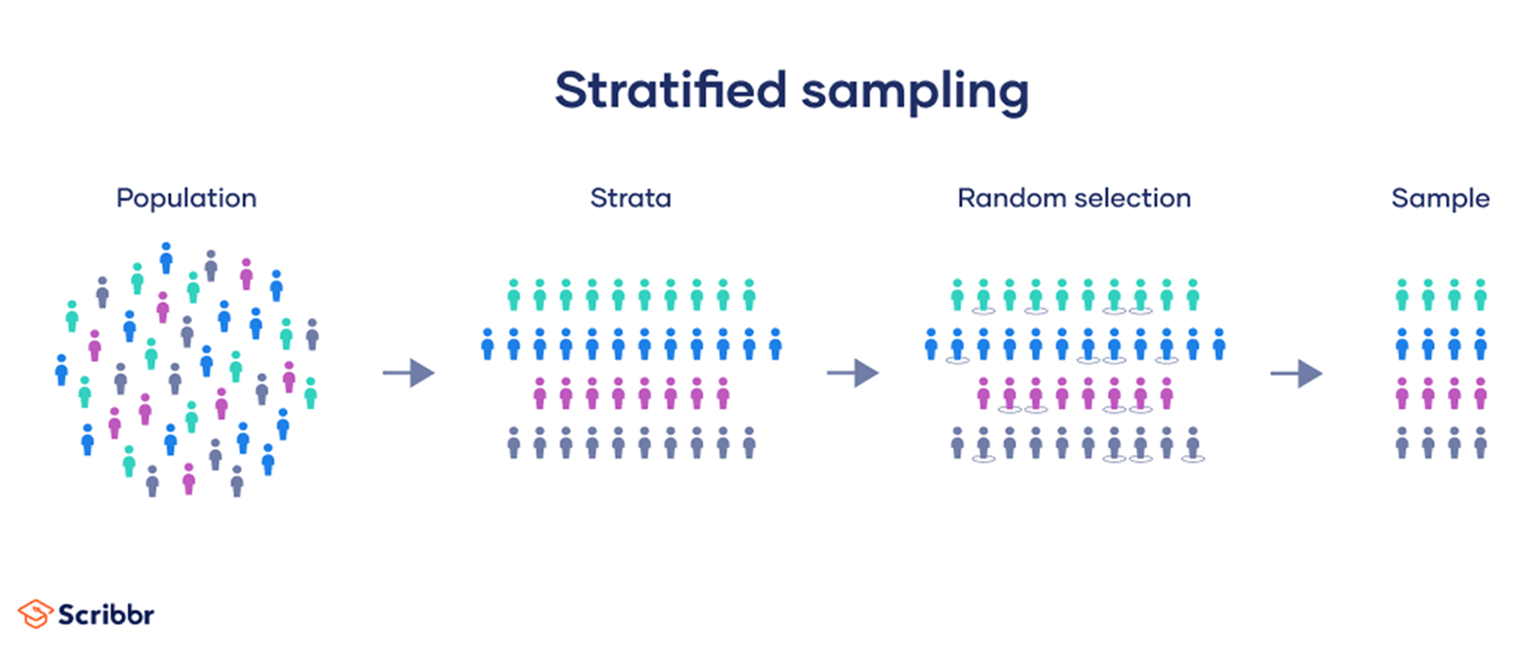![Stratified Sampling](stratified_sampling.png)


In [29]:
# Stratified Sampling

X= df_processed.drop('class',axis=1)
y= df_processed['class']


# create a boolean mask for the second class
second_class_mask = (y == 1)

# split the second class into train and test sets
X_second_class = X[second_class_mask]
y_second_class = y[second_class_mask]
X_second_class_train, X_second_class_test, y_second_class_train, y_second_class_test = train_test_split(
    X_second_class, y_second_class, test_size=0.3, random_state=42)

# create a boolean mask for the first class
first_class_mask = (y == 0)

# split the first class into train and test sets
X_first_class = X[first_class_mask]
y_first_class = y[first_class_mask]
X_first_class_train, X_first_class_test, y_first_class_train, y_first_class_test = train_test_split(
    X_first_class, y_first_class, test_size=0.3, random_state=42)

# shuffle the train and test sets for each class
np.random.seed(42)
shuffle_idx_train = np.random.permutation(len(X_first_class_train) + len(X_second_class_train))
shuffle_idx_test = np.random.permutation(len(X_first_class_test) + len(X_second_class_test))
a = np.concatenate([X_first_class_train, X_second_class_train])[shuffle_idx_train]            #a is a dummy variable
b = np.concatenate([y_first_class_train, y_second_class_train])[shuffle_idx_train]             #b is a dummy variable
X_test = np.concatenate([X_first_class_test, X_second_class_test])[shuffle_idx_test]
y_test = np.concatenate([y_first_class_test, y_second_class_test])[shuffle_idx_test]            # we will use this for the final test

In [30]:
pd.Series(y_test).value_counts()

0    3799
1    2914
Name: count, dtype: int64

#### Data Agumentation ####
###### Now we are ready for agumentation ###### 

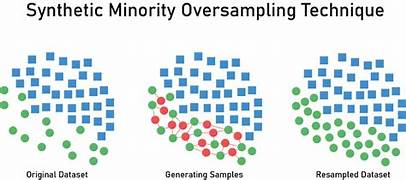* ![alt text](Screenshot%20(42).png)

In [31]:
df_processed.shape # check the shape 

(22372, 12)

In [32]:
df_processed['class'].value_counts()

class
0    12661
1     9711
Name: count, dtype: int64

In [33]:
X.head()

,count,dst_host_srv_serror_rate,dst_host_serror_rate,same_srv_rate,diff_srv_rate,src_bytes,srv_count,srv_serror_rate,dst_host_srv_diff_host_rate,dst_host_srv_count,dst_host_count
0,229,0.0,0.0,0.04,0.06,0,10,0.00,0.00,10,255.0
1,136,0.0,0.0,0.01,0.06,0,1,0.00,0.00,1,255.0
2,1,0.0,0.0,1.00,0.00,12983,1,0.00,0.02,86,134.0
3,1,0.0,0.0,1.00,0.00,20,65,0.00,0.28,57,3.0
4,1,0.0,0.0,1.00,0.00,0,8,0.12,0.02,86,29.0


In [34]:
# Smote Oversampling
from imblearn.over_sampling import SMOTE

X = df_processed.drop('class',axis=1)
y = df_processed['class']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape)
print(y_smote.shape)


(25322, 11)
(25322,)


In [35]:
print(y_smote.value_counts())

class
0    12661
1    12661
Name: count, dtype: int64


<Axes: >

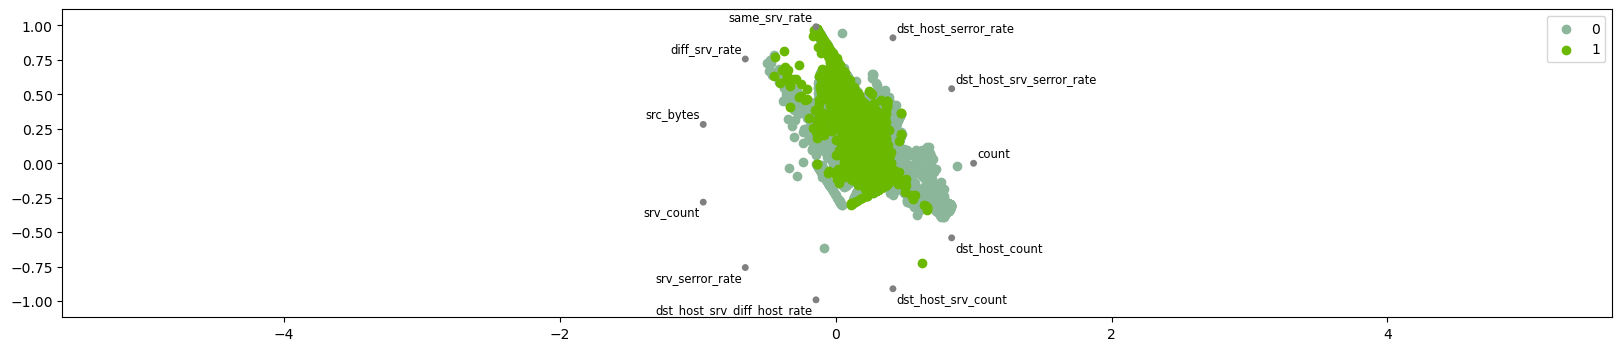

In [36]:
pd.plotting.radviz(df_processed, 'class')

##### as we see data is balanced abnormal= 12661,normal=12661

### Step 8 : Modeling 

In [37]:
# splittig data into train and test
from sklearn.model_selection import train_test_split
X=X_smote
y=y_smote
X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=101)  # a,b are dummy variables

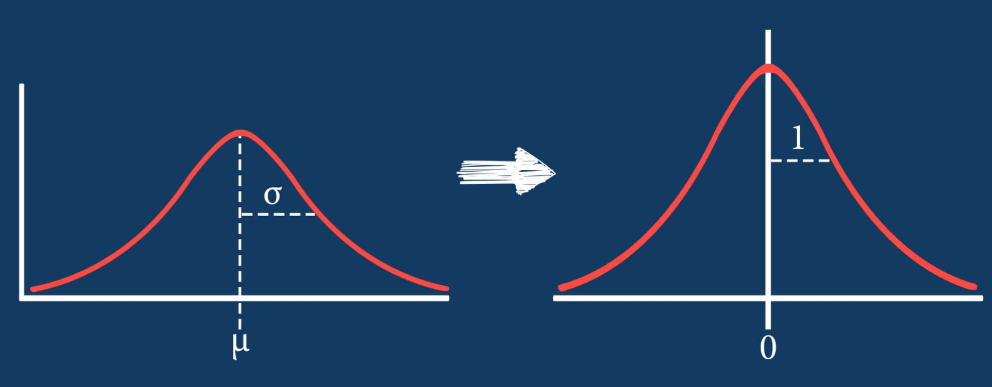

In [38]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Serialize the scaler using pickle
pickle_scaler_path = "scaler.pkl"
with open(pickle_scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

pickle_scaler_path

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'scaler.pkl'

In [39]:
# Model Building : our function to evaluate the model using cross validation and other metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score



def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)


    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred))
    print(roc_auc_score(y_test, pred))


    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

##### Now test some models #####

ROC AUC: 0.9374 (+/- 0.0023)
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      3799
           1       0.75      0.91      0.82      2914

    accuracy                           0.83      6713
   macro avg       0.83      0.84      0.83      6713
weighted avg       0.85      0.83      0.83      6713

[[2920  879]
 [ 262 2652]]
0.8300312825860271
0.8393562731802955


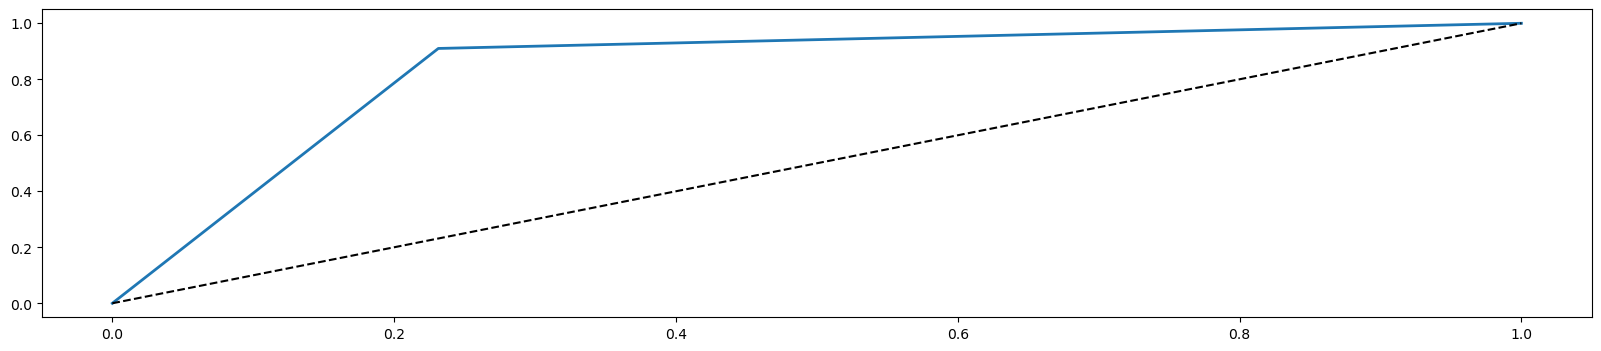

In [40]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_eval(model,X_train,y_train)

In [41]:
# trying to find the best k value
#from sklearn.neighbors import KNeighborsClassifier
#for k in range(1,10):
#    model = KNeighborsClassifier(n_neighbors=k)
#    model_eval(model,X_train,y_train)

In [42]:
# KNN

#model = KNeighborsClassifier(1)
#model_eval(model,X_train,y_train)

In [43]:
# LGBM
#
#from lightgbm import LGBMClassifier
#
#model = LGBMClassifier()
#model_eval(model,X_train,y_train)

In [44]:
# XGBoost
#
#
#from xgboost import XGBClassifier
#
#model = XGBClassifier()
#model_eval(model,X_train,y_train)

In [50]:
pd.reset_option('display.max_columns') 
pd.reset_option('display.max_rows')
# NOte: we reset the data to see the full result

In [49]:
# if you want fast reuslt , uncomment one of the models above and comment this cell
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:05<00:02,  2.04s/it]

[LightGBM] [Info] Number of positive: 8888, number of negative: 8837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1916
[LightGBM] [Info] Number of data points in the train set: 17725, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501439 -> initscore=0.005755
[LightGBM] [Info] Start training from score 0.005755


100%|██████████| 29/29 [01:05<00:00,  2.26s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,0.99,0.99,1.34
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.09
BaggingClassifier,0.99,0.99,0.99,0.99,0.46
ExtraTreesClassifier,0.99,0.99,0.99,0.99,1.80
XGBClassifier,0.99,0.99,0.99,0.99,0.59
LGBMClassifier,0.98,0.98,0.98,0.98,0.25
ExtraTreeClassifier,0.98,0.98,0.98,0.98,0.05
KNeighborsClassifier,0.94,0.94,0.94,0.94,0.92
AdaBoostClassifier,0.93,0.93,0.93,0.93,0.89


### Step 9 : Model evalution 

In [51]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3799
           1       0.92      0.92      0.92      2914

    accuracy                           0.93      6713
   macro avg       0.93      0.93      0.93      6713
weighted avg       0.93      0.93      0.93      6713
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3799
           1       0.99      0.99      0.99      2914

    accuracy                           0.99      6713
   macro avg       0.99      0.99      0.99      6713
weighted avg       0.99      0.99      0.99      6713
 

		 BernoulliNB 

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      3799
           1       0.70      0.93      0.80      2914

    accuracy                           0.80      6713
   macro avg       0.82      0.81      0.80      6713
weight

### Step 10: Hyper-parameter tuning and re-modeling .

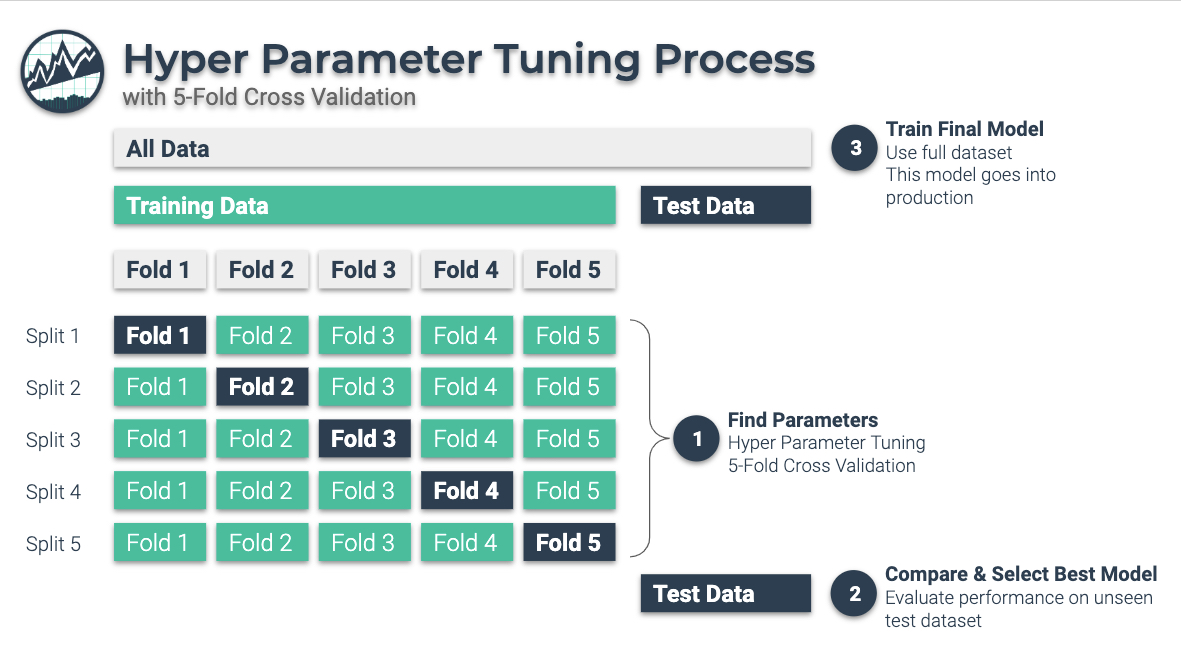

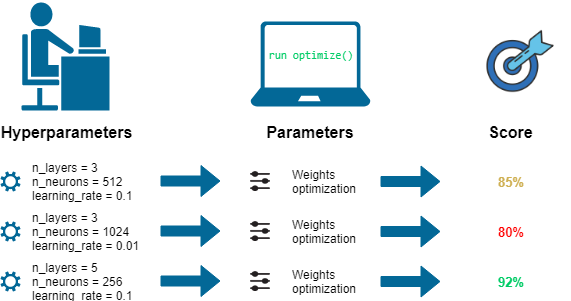

ROC AUC: 0.9983 (+/- 0.0003)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3799
           1       0.98      0.99      0.99      2914

    accuracy                           0.99      6713
   macro avg       0.99      0.99      0.99      6713
weighted avg       0.99      0.99      0.99      6713

[[3755   44]
 [  38 2876]]
0.9877848949798897
0.987688755285997


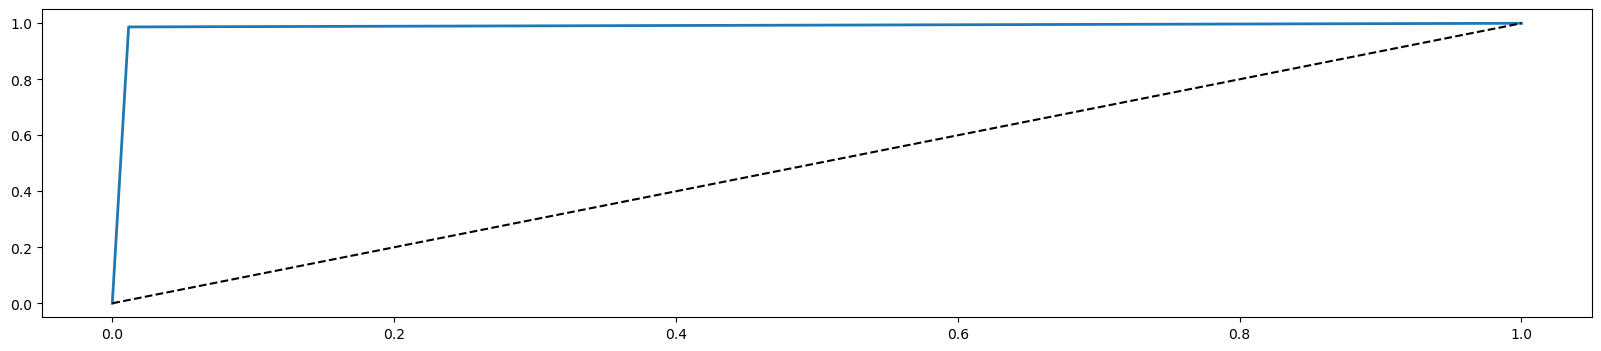

In [52]:
# XGBoost
#
#
from xgboost import XGBClassifier
#
model = XGBClassifier()
model_eval(model,X_train,y_train)

### Step 11 : Extract Model 

In [54]:
# Serialize the trained Random Forest model using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, 'wb') as file:
    pickle.dump(model, file)

pickle_model_path

'model.pkl'

### Step 12 : Model deployment 

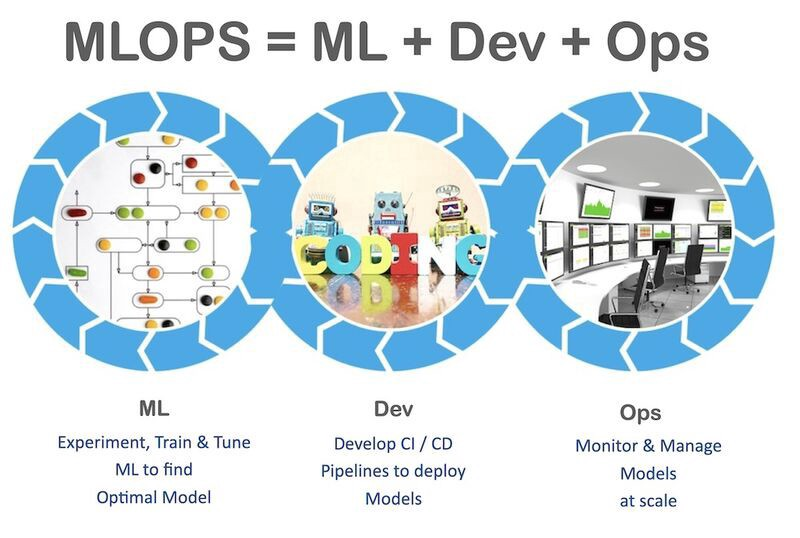

### Step 13 : Real world prediction

#### Note: Real-world prediction via API (Step 13) requires an active EC2 instance or any cloud platform . Once deployed on EC2, 
#### we can make predictions using HTTP POSTrequests with JSON input.

In [56]:
import requests

def call_api(url, json_data):
    """
    Call an API with a given URL and JSON payload.

    Args:
    - url (str): The API endpoint to call.
    - json_data (dict): The JSON data to send in the request.

    Returns:
    - dict: The API response as a dictionary.
    """
    headers = {
        'Content-Type': 'application/json'
    }

    response = requests.post(url, headers=headers, json=json_data)

    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

# Example usage
# url = 'https://api.example.com/data'
# json_input = {"key": "value"}
# response = call_api(url, json_input)
# print(response)

In [57]:
url="http://ec2-35-154-40-171.ap-south-1.compute.amazonaws.com:8080/predict"

In [58]:
json_data=X.iloc[15000:16000].to_dict()

In [59]:
X.iloc[5000].to_dict()

{'count': 1.0,
 'dst_host_srv_serror_rate': 0.0,
 'dst_host_serror_rate': 0.0,
 'same_srv_rate': 1.0,
 'diff_srv_rate': 0.0,
 'src_bytes': 162.0,
 'srv_count': 1.0,
 'srv_serror_rate': 0.0,
 'dst_host_srv_diff_host_rate': 0.0,
 'dst_host_srv_count': 14.0,
 'dst_host_count': 17.0}

In [90]:
# results=call_api(url, json_data)

In [91]:
# print(results)

In [92]:
# y.iloc[15000:16000].to_dict()